In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

In [343]:
data = pd.read_csv('TANKTEMP060-092.txt',delimiter="\t", header=None, names=["date", "value"])

In [344]:
data.head()

,date,value
0,2015-085-01:47:10.114,19.311741
1,2015-085-01:47:10.882,19.311700
2,2015-085-01:48:22.882,19.311700
3,2015-085-01:49:18.114,19.311741
4,2015-085-01:50:46.882,19.311700


In [345]:
data['StandardTime']=0
data.head()

,date,value,StandardTime
0,2015-085-01:47:10.114,19.311741,0
1,2015-085-01:47:10.882,19.311700,0
2,2015-085-01:48:22.882,19.311700,0
3,2015-085-01:49:18.114,19.311741,0
4,2015-085-01:50:46.882,19.311700,0


In [346]:
import calendar
import datetime

for i in range(len(data)):
    dd=data['date'][i].split('-')
    yy=int(dd[0])
    jd=int(dd[1])
    sec=dd[2].split(':')
    ss=sec[2][:-4]
    mm=sec[2][-3:]
    month = 1
    day = 0
    while jd - calendar.monthrange(y,month)[1] > 0 and month <= 12:
        jd = jd - calendar.monthrange(y,month)[1]
        month = month + 1

    data['StandardTime'][i]=datetime.datetime(yy, month, jd, int(sec[0]),int(sec[1]),int(ss),int(mm)*1000)

In [347]:
data.head()

,date,value,StandardTime
0,2015-085-01:47:10.114,19.311741,2015-03-26 01:47:10.114000
1,2015-085-01:47:10.882,19.311700,2015-03-26 01:47:10.882000
2,2015-085-01:48:22.882,19.311700,2015-03-26 01:48:22.882000
3,2015-085-01:49:18.114,19.311741,2015-03-26 01:49:18.114000
4,2015-085-01:50:46.882,19.311700,2015-03-26 01:50:46.882000


In [365]:
data_std = data.copy()
data_std.head()

,date,value,StandardTime
0,2015-085-01:47:10.114,19.311741,2015-03-26 01:47:10.114000
1,2015-085-01:47:10.882,19.311700,2015-03-26 01:47:10.882000
2,2015-085-01:48:22.882,19.311700,2015-03-26 01:48:22.882000
3,2015-085-01:49:18.114,19.311741,2015-03-26 01:49:18.114000
4,2015-085-01:50:46.882,19.311700,2015-03-26 01:50:46.882000


In [366]:
data_std.drop('date', axis=1, inplace=True)
data_std.head()

,value,StandardTime
0,19.311741,2015-03-26 01:47:10.114000
1,19.311700,2015-03-26 01:47:10.882000
2,19.311700,2015-03-26 01:48:22.882000
3,19.311741,2015-03-26 01:49:18.114000
4,19.311700,2015-03-26 01:50:46.882000


In [368]:
data_std.StandardTime = pd.to_datetime(data_std.StandardTime)
data_std = data_std.set_index('StandardTime')

In [370]:
data_std.head()

,value
StandardTime,
2015-03-26 01:47:10.114,19.311741
2015-03-26 01:47:10.882,19.311700
2015-03-26 01:48:22.882,19.311700
2015-03-26 01:49:18.114,19.311741
2015-03-26 01:50:46.882,19.311700


Text(0.5, 0, 'Time')

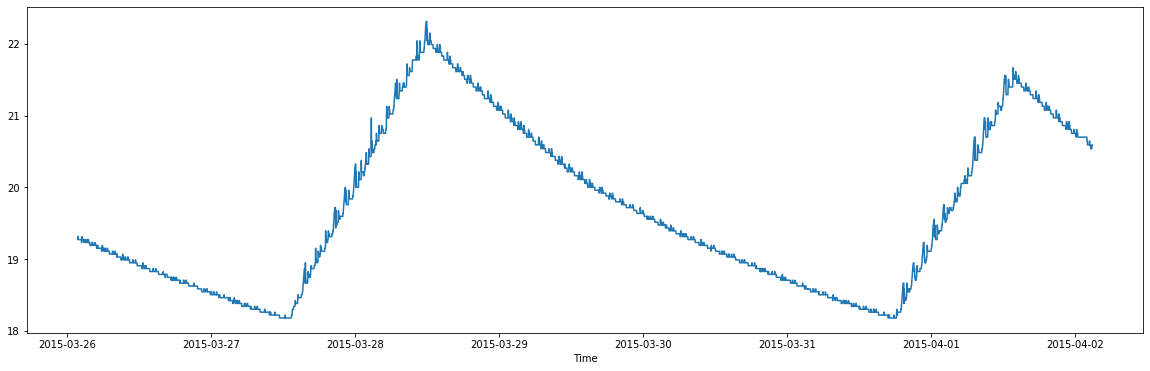

In [379]:
plt.figure(figsize=(20,6))
plt.plot(data_std)
plt.xlabel('Time')

In [372]:
df=data_std.copy()
df.head()

,value
StandardTime,
2015-03-26 01:47:10.114,19.311741
2015-03-26 01:47:10.882,19.311700
2015-03-26 01:48:22.882,19.311700
2015-03-26 01:49:18.114,19.311741
2015-03-26 01:50:46.882,19.311700


In [375]:
print('length = ' +str(len(df)))

length = 6079


In [376]:
train, test = df[:-500], df[-500:]

In [378]:
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [ ]:
n_index = 100
n_features = 1

generator = TimeseriesGenerator(train, train, length=n_input, batch_size=100)

model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add()



In [241]:
print (datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S.%f')[:-3])

2020-03-02 11:51:45.654


In [259]:
import datetime

x = datetime.datetime(2020, 5, 17, 4,30,28)
print(x)

2020-05-17 04:30:28


In [319]:
sec='2:54:45.345'
sec1=sec.split(':')
sec1[1]
print(type(sec1[2]))
print(sec1[2][:-4])
ss=sec1[2][:-4]
mm=sec1[2][-3:]
print(mm)
print(type(mm))
x = datetime.datetime(2020, 5, 17, int(sec1[0]),int(sec1[1]),int(ss),int(mm)*1000)
print(x)

# print(datetime.strptime('30/03/09 16:31:32.123', '%d/%m/%y %H:%M:%S.%f'))

<class 'str'>
45
345
<class 'str'>
2020-05-17 02:54:45.345000


In [324]:
import calendar
import datetime

for i in range(len(data)):
    dd=data['date'][i].split('-')
    yy=int(dd[0])
    jd=int(dd[1])
    sec=dd[2].split(':')
    ss=sec[2][:-4]
    mm=sec[2][-3:]
    month = 1
    day = 0
    while jd - calendar.monthrange(y,month)[1] > 0 and month <= 12:
        jd = jd - calendar.monthrange(y,month)[1]
        month = month + 1

    data['ddd'][i]=datetime.datetime(yy, month, jd, int(sec[0]),int(sec[1]),int(ss),int(mm)*1000)
                                
    

In [325]:
data.head()

,date,value,da,ddd
0,2015-085-01:47:10.114,19.311741,38.623482,2015-03-26 01:47:10.114000
1,2015-085-01:47:10.882,19.311700,38.623400,2015-03-26 01:47:10.882000
2,2015-085-01:48:22.882,19.311700,38.623400,2015-03-26 01:48:22.882000
3,2015-085-01:49:18.114,19.311741,38.623482,2015-03-26 01:49:18.114000
4,2015-085-01:50:46.882,19.311700,38.623400,2015-03-26 01:50:46.882000


In [224]:
aa=datetime.datetime(2016, 3, 22, 12, 33, 45, 756500)
aa

datetime.datetime(2016, 3, 22, 12, 33, 45, 756500)

In [268]:
from datetime import datetime

datetime_str = '09/19/18 13:55:26'

datetime_object = datetime.strptime(datetime_str, '%m/%d/%y %H:%M:%S')

print(type(datetime_object))
print(datetime_object)

<class 'datetime.datetime'>
2018-09-19 13:55:26


In [309]:
import datetime
 
# YYYY-MM-DD HH:MM:SS.MS 
xt = datetime.datetime(2018, 10, 10, 3, 38, 1, 112*1000)
print(xt)
 
print(xt.strftime("%a"))

2018-10-10 03:38:01.112000
Wed


In [293]:
a="45.345"
qa=a[-3:]
qa

'345'

## Converse Julial date To Standard date

In [ ]:
import calendar

def JulianDate_to_MMDDYYY(y,jd):
    month = 1
    day = 0
    while jd - calendar.monthrange(y,month)[1] > 0 and month <= 12:
        jd = jd - calendar.monthrange(y,month)[1]
        month = month + 1
    print (month,jd,y)
    print (type(month))
    

JulianDate_to_MMDDYYY(2008,67)
